In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

In [ ]:
# Path of the file to read
museum_filepath = "../datasets/museum_visitors.csv"

In [ ]:
# Fill in the line below to read the file into a variable museum_data
museum_data = pd.read_csv(museum_filepath, index_col="Date", parse_dates=True)
import numpy as np
# Replace infinite values with NaN
museum_data.replace([np.inf, -np.inf], np.nan, inplace=True)

print(museum_data.tail()) # Your code here

            Avila Adobe  Firehouse Museum  Chinese American Museum  \
Date                                                                 
2018-07-01        23136              4191                     2620   
2018-08-01        20815              4866                     2409   
2018-09-01        21020              4956                     2146   
2018-10-01        19280              4622                     2364   
2018-11-01        17163              4082                     2385   

            America Tropical Interpretive Center  
Date                                              
2018-07-01                                  4718  
2018-08-01                                  3891  
2018-09-01                                  3180  
2018-10-01                                  3775  
2018-11-01                                  4562  


<Axes: title={'center': 'Monthly Visitors to Los Angeles City Museums'}, xlabel='Date', ylabel='Individuals'>

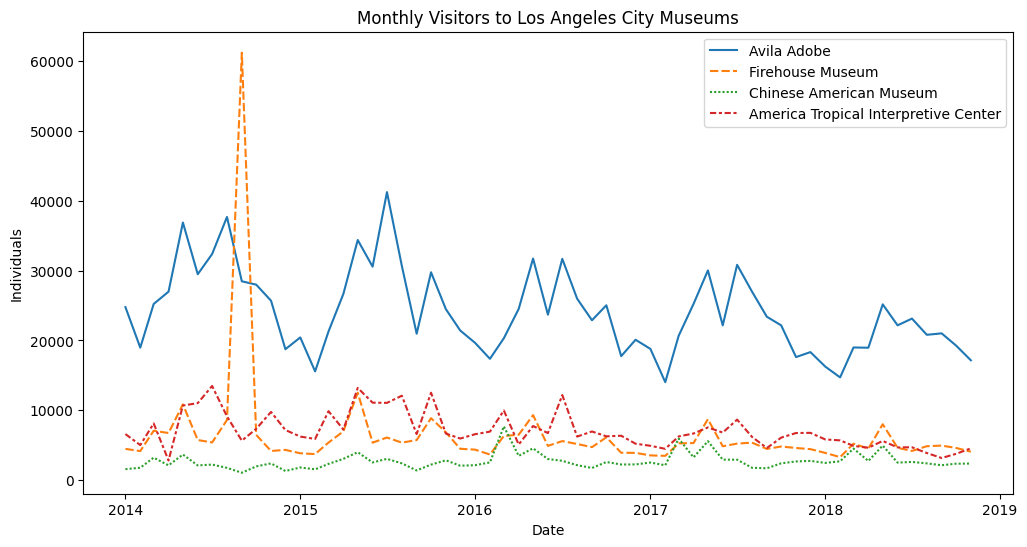

In [ ]:
# Line chart showing the number of visitors to each museum over time
plt.figure(figsize=(12, 6))
plt.title("Monthly Visitors to Los Angeles City Museums")
plt.ylabel("Individuals")
sns.lineplot(data=museum_data)

<Axes: title={'center': 'Monthly Visitors to Avila Adobe Museum'}, xlabel='Date', ylabel='Visitors'>

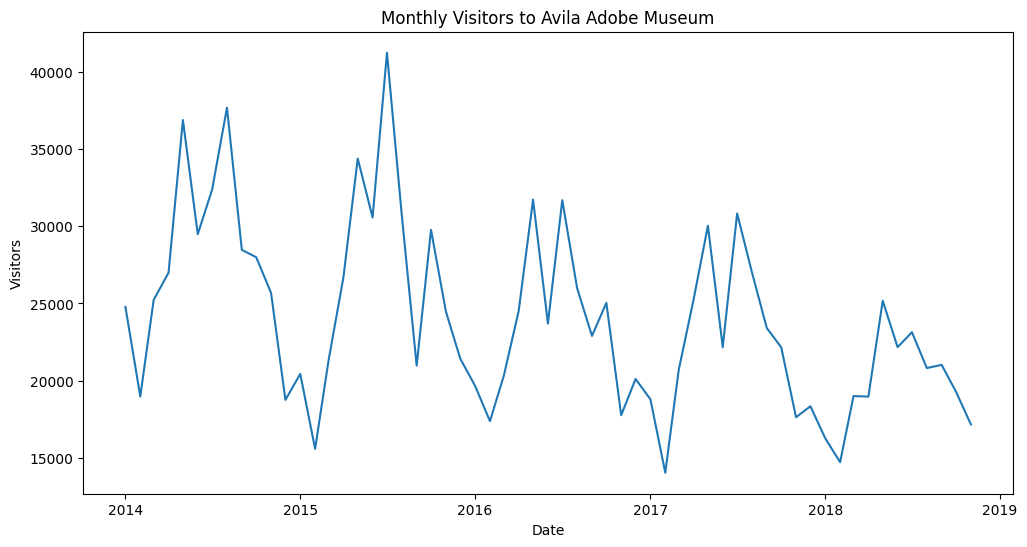

In [ ]:
# Line plot showing the number of visitors to Avila Adobe over time
plt.figure(figsize=(12, 6))
plt.title("Monthly Visitors to Avila Adobe Museum")
plt.ylabel("Visitors")
sns.lineplot(data=museum_data["Avila Adobe"])

# 觀察數據週期變化
## 使用 sns.FacetGrid()
將資料以年的長度拆分成，分析資料是否有季節性的週期變化。

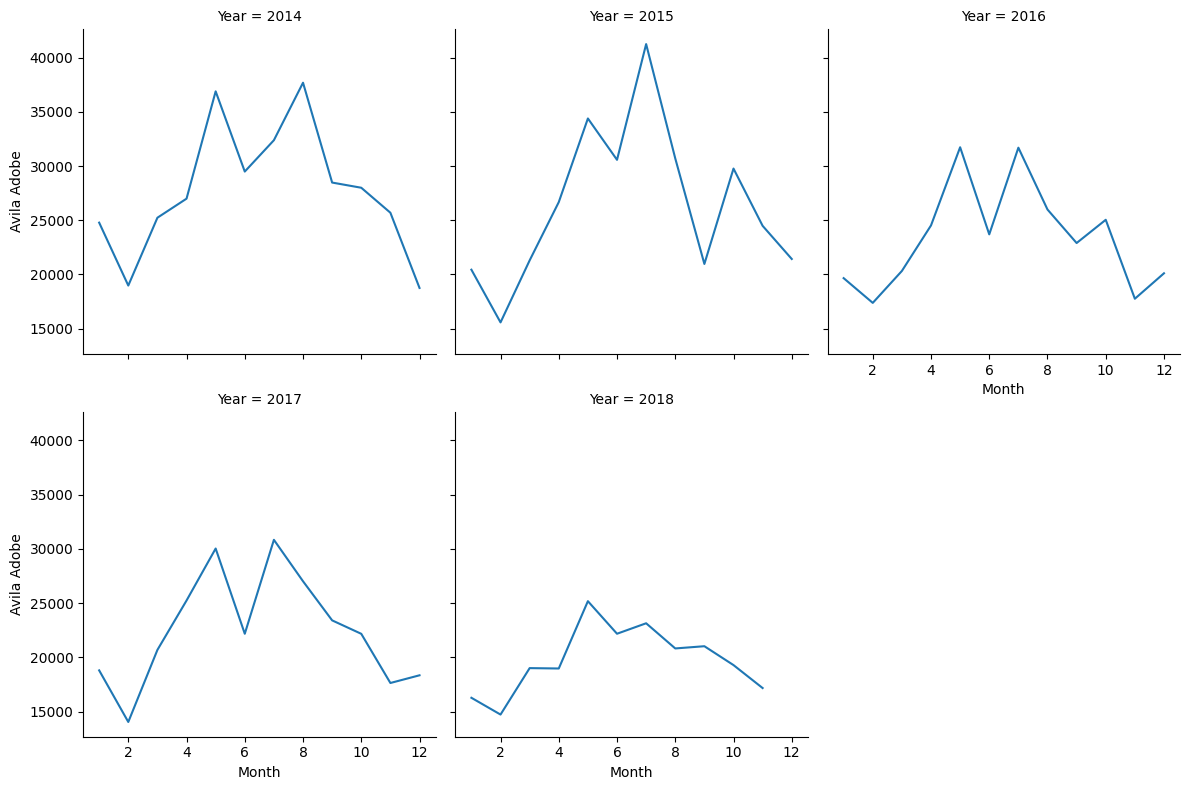

In [ ]:
# Use FacetGrid to show the visitor trend for Avila Adobe, separated by years
avila = museum_data.reset_index()[["Date", "Avila Adobe"]].copy()
avila["Year"] = avila["Date"].dt.year
avila["Month"] = avila["Date"].dt.month
#group by year and month
avila = avila.groupby(["Year", "Month"]).agg({"Avila Adobe": "sum"}).reset_index()

g = sns.FacetGrid(avila, col="Year", col_wrap=3, height=4)
g.map(sns.lineplot, "Month", "Avila Adobe")
# Show the plot
plt.show()

## 用熱力圖 sns.heatmap() 分析以年/月的資料變化
這也是利用視覺化洞察資料變化的好方式。

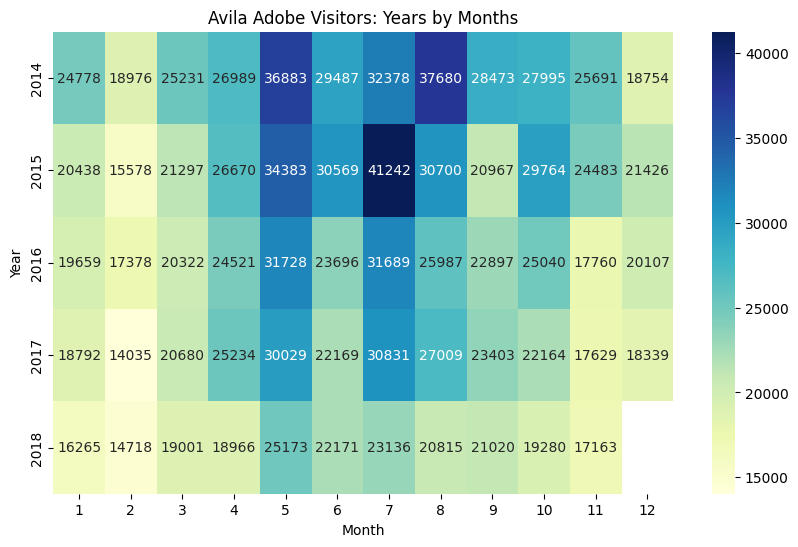

In [ ]:
# Pivot the avila DataFrame to have years as rows and months as columns
avila_pivot = avila.pivot(index="Year", columns="Month", values="Avila Adobe")

plt.figure(figsize=(10, 6))
sns.heatmap(avila_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Avila Adobe Visitors: Years by Months")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()